# Unsupervised learning 

Unsupervised learning is a type of machine learning where the model learns patterns from input data without explicit feedback or labeled responses. In unsupervised learning, the goal is to find hidden structure or relationships in the input data. This is in contrast to supervised learning, where the model learns from labeled data with a known output.

In unsupervised learning, the model tries to infer the natural structure present within a set of data samples. Common tasks in unsupervised learning include clustering, dimensionality reduction(PCA), etc. 

We will consider a Customer Segmentation example using the dataset Mall Customer Segmentation Data on Kaggle. <br>
Data link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### Clustering

Clustering is a type of unsupervised machine learning technique used to group similar data points together. The goal of clustering is to partition a set of data points into clusters such that data points in the same cluster are more similar to each other than to those in other clusters. Clustering is often used in various applications such as customer segmentation, anomaly detection, and image segmentation.

The core concept of clustering is quite simple. Essentially, it involves recognizing groups within a set of points. We might think, "I have these points, and they seem to form clusters. It would be useful to define these clusters more precisely and, when a new point is introduced, assign it to the appropriate cluster." This concept promotes experimentation and offers a range of clustering algorithms to explore.

### KMean Clustering
##### KMeans general process:

K-means algorithm is the most popular and yet simplest of all the clustering algorithms. Here is how it works:
1. Select the number of clusters $k$ that you think is the optimal number.
2. Initialize $k$ points as "centroids" randomly within the space of our data.
3. Assign each observation to its closest centroid.
4. Update the centroids to the center of all the attributed set of observations. 
5. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).

The algorithm aims to minimize the within-cluster sum of squares, which is the sum of the squared distances between each data point and its assigned centroid. However, K-means is sensitive to the initial choice of centroids and may converge to a local minimum, which may not be the optimal solution. Therefore, it is common practice to run the algorithm multiple times with different initializations and choose the solution with the lowest within-cluster sum of squares.

This algorithm is easy to describe and visualize. Let's take a look.

array([[1.4629, 1.7974],
       [1.4984, 1.5395],
       [0.5565, 0.7249],
       [0.8081, 1.9161],
       [1.4016, 0.8231],
       [1.4597, 1.6336],
       [1.0113, 1.3635],
       [1.3565, 0.7371],
       [0.9339, 1.2775],
       [0.6919, 1.1792],
       [0.9919, 1.1915],
       [0.2629, 1.5395],
       [0.9145, 1.257 ],
       [0.9726, 1.4167],
       [0.6145, 1.2488],
       [1.3855, 1.8629],
       [0.9403, 1.4658],
       [1.2242, 1.4167],
       [1.4048, 0.8804],
       [0.8113, 1.4781],
       [1.0984, 1.8465],
       [1.4919, 1.1096],
       [1.0371, 1.4944],
       [0.5403, 1.0769],
       [0.2565, 0.8193],
       [0.2823, 1.4044],
       [0.5887, 1.167 ],
       [0.9339, 1.4617],
       [1.3661, 0.8026],
       [0.2984, 0.8722],
       [0.8597, 1.4617],
       [1.1565, 0.7044],
       [0.3081, 1.605 ],
       [1.2532, 0.7208],
       [0.2468, 0.9705],
       [1.3048, 1.8956],
       [0.7306, 1.343 ],
       [0.4694, 1.8629],
       [0.7145, 0.6798],
       [0.8726, 1.3184],


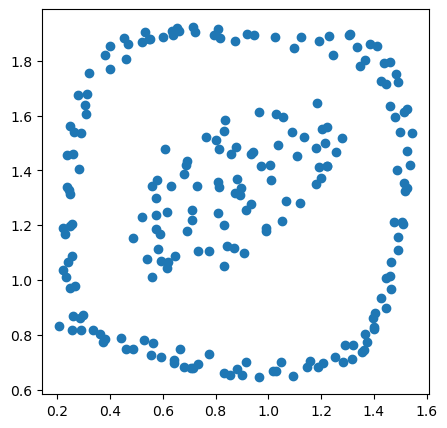

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def loadDataSet():
    a = []
    f = open("../../data/B.txt",'r')
    lines = f.readlines()   #make lines a list, has index inside already
    f.close()
    for line in lines:
        b = ['', '']
        b[0],b[1] = line.split()
        a.append(b)
    dataSet = np.array(a, dtype=float)   
    return dataSet

X = loadDataSet()
display(X)
plt.figure(figsize = (5, 5))  
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [6]:
# Euclidean distance
def euclidean_distance(x1, x2):
    # np.sum((x1 - x2)**2 = (x11 - x21)**2 + (x12 - x22)**2
    return np.sqrt(np.sum((x1 - x2)**2)) 

# K-means clustering
def kmeans_clustering(X, k, max_iters = 200):
    n, d = X.shape
    centers = X[np.random.choice(n, k, replace=False)]
    labels = np.zeros(n)
    
    for iter in range(max_iters):
        # Assign each data point to the nearest center
        for i in range(n):
            distances = [euclidean_distance(X[i], center) for center in centers]
            labels[i] = np.argmin(distances)
        # print("Current Iteration Number: ", iter)
        # print("Distance in current iteration: ", distances)
        # Update centers
        for j in range(k):
            centers[j] = np.mean(X[labels == j], axis=0)
    
    return labels, centers

[1. 1. 2. 3. 4. 1. 0. 4. 0. 0. 0. 3. 0. 0. 0. 1. 0. 1. 4. 0. 1. 4. 1. 2.
 2. 3. 0. 0. 4. 2. 0. 4. 3. 4. 2. 1. 0. 3. 2. 0. 0. 2. 0. 1. 4. 0. 4. 1.
 2. 1. 0. 4. 1. 4. 0. 3. 0. 4. 1. 3. 1. 2. 1. 1. 2. 2. 1. 4. 2. 0. 4. 2.
 2. 3. 4. 0. 3. 4. 4. 4. 1. 3. 0. 1. 4. 0. 4. 1. 2. 0. 2. 0. 0. 1. 1. 3.
 2. 3. 3. 2. 1. 3. 1. 1. 2. 2. 3. 0. 1. 2. 0. 4. 3. 0. 1. 0. 2. 1. 3. 3.
 2. 4. 1. 1. 3. 2. 1. 0. 0. 3. 0. 3. 4. 4. 1. 1. 4. 2. 1. 0. 3. 0. 1. 1.
 2. 4. 4. 4. 2. 0. 4. 3. 3. 2. 1. 2. 0. 4. 1. 2. 0. 3. 2. 2. 2. 1. 2. 0.
 0. 1. 4. 3. 2. 1. 2. 4. 0. 4. 3. 0. 3. 0. 3. 1. 3. 3. 4. 2. 2. 2. 2. 1.
 2. 4. 3. 2. 0. 3. 1. 1. 1. 4. 1. 0. 4. 1. 0. 0. 2. 2. 2. 2. 0. 1. 0. 1.
 3. 0.]


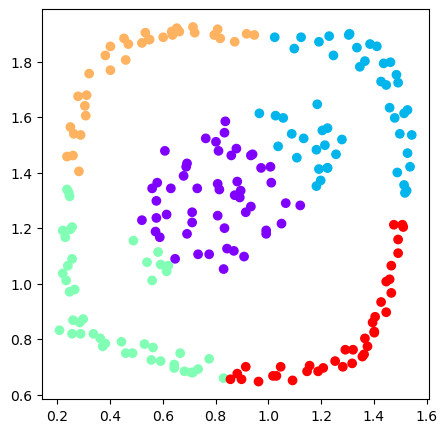

In [23]:
# Fit KMeans and get the predictions

seed = 9 # Control the random behavior of KMean
np.random.seed(seed)

label_pred, centroid = kmeans_clustering(X, k = 5)

print(label_pred)

plt.figure(figsize = (5, 5))  
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:, 0], X[:, 1], c = label_pred, cmap ='rainbow')
plt.show()

## Choosing the number of clusters for K-means

In contrast to the supervised learning tasks such as classification and regression, clustering requires more effort to choose the optimization criterion. Usually, when working with k-means, we optimize the sum of squared distances between the observations and their centroids.

$$\Large J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

where $C$ – is a set of clusters with power $K$, $\mu_k$ is a centroid of a cluster $C_k$.

This definition seems reasonable -- we want our observations to be as close to their centroids as possible. But, there is a problem -- the optimum is reached when the number of centroids is equal to the number of observations, so you would end up with every single observation as its own separate cluster.

In order to avoid that case, we should choose a number of clusters after which a function $J(C_k)$ is decreasing less rapidly. More formally,
$$\Large D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

Let's look at an example.

Current Iteration Number:  0
Distance in current iteration:  [0.4561160597918034]
Current Iteration Number:  1
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  2
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  3
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  4
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  5
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  6
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  7
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  8
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  9
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  10
Distance in current iteration:  [0.3277544475433362]
Current Iteration Number:  11
Distance in current iteration:  [0.3277544475433362]
Current Iterat

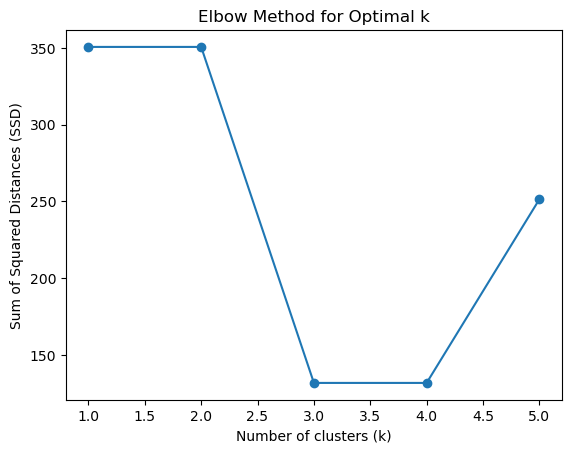

In [4]:
# Calculate the sum of squared distances (SSD) for a range of k values
def calculate_ssd(X, k_range):
    ssd = []
    for k in k_range:
        centers, labels = kmeans_clustering(X, k)
        ssd.append(sum(np.min(np.array([[euclidean_distance(X[i], centers[j]) for j in range(k)] for i in range(len(X))]), axis = 1)))
    return ssd

# Range of k values
k_range = range(1, 6)

# Calculate SSD for each k value
ssd = calculate_ssd(X, k_range)

# Plot SSD vs. k
print(ssd)
plt.plot(k_range, ssd, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.show()

### The lowest ssd should be 3 or 4, which may not be the case by visually checking the data distribution. 

Usually, understanding the business problem and getting to know the dataset is critical when making a decision on K. The optimal K doesn't mean the best or the fittest K for the problem. 

### Agglomerative clustering

Agglomerative clustering is a hierarchical clustering technique that builds clusters by merging each sample together. Here's how it works:

Initialization: Start with each data point as its cluster.
Merge: Find the two closest clusters and merge them into a single cluster.
Update Distance Matrix: Recalculate the distance matrix to reflect the new distances between clusters.
Repeat: Repeat Merge and Update until k clusters remain

Agglomerative clustering, unlike K-means, does not suffer from the problem of converging to local minima. This is because agglomerative clustering builds the clusters in a hierarchical manner, starting with each data point as a single cluster and then iteratively merging the closest clusters based on a chosen linkage criterion (e.g., single linkage, complete linkage, average linkage).

Since agglomerative clustering considers all possible merges at each step and does not depend on initial centroids like K-means, it is less prone to getting stuck in local minima. However, the choice of linkage criterion can affect the clustering result, and different criteria may lead to different cluster structures. Overall, agglomerative clustering is considered more robust than K-means in terms of finding a global optimum, but it can be computationally expensive for large datasets due to its time complexity.

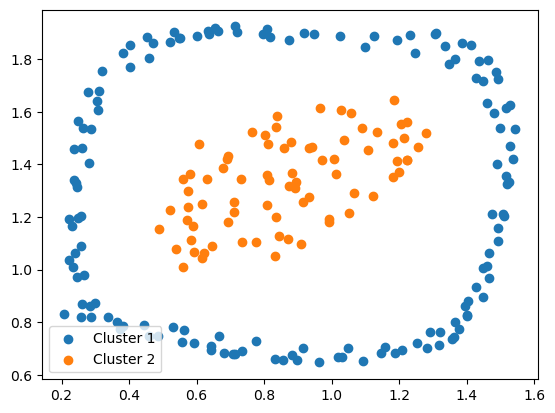

In [22]:
# Perform agglomerative clustering
def agglomerative_clustering(X, k):
    n = X.shape[0]
    clusters = [[i] for i in range(n)]
    while len(clusters) > k:
        min_dist = np.inf
        merge_indices = None
        
        # Find closest clusters to merge
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                cluster1 = clusters[i]
                cluster2 = clusters[j]
                
                # Calculate distance between clusters (single-linkage)
                dist = np.min([euclidean_distance(X[p1], X[p2]) for p1 in cluster1 for p2 in cluster2])
                # Calculate distance between clusters (complete-linkage)
                # dist = np.max([euclidean_distance(X[p1], X[p2]) for p1 in cluster1 for p2 in cluster2])
                # Calculate distance between clusters (average linkage)
                # dist = np.mean([euclidean_distance(X[p1], X[p2]) for p1 in cluster1 for p2 in cluster2])
                
                if dist < min_dist:
                    min_dist = dist
                    merge_indices = (i, j)
        
        # Merge closest clusters
        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]
    
    return clusters

# Run agglomerative clustering
k = 2  # Number of clusters
clusters = agglomerative_clustering(X, k)

# Plot clusters
for i, cluster in enumerate(clusters):
    points = X[cluster]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')

plt.legend()
plt.show()

### Any conclusion?



### Using sklearn clustering library for customer segmentation problem. 

In [6]:
mallData = pd.read_csv('../../data/Mall_Customers.csv')
mallData

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
mallData['Gender_num'] = mallData['Gender'].astype('category').cat.codes
mallData

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_num
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [8]:
mallData.drop(['CustomerID', 'Gender'], axis = 1, inplace = True)
mallData

,Age,Annual Income (k$),Spending Score (1-100),Gender_num
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [9]:
mallDataCleaned = mallData.to_numpy()
mallDataCleaned

array([[ 19,  15,  39,   1],
       [ 21,  15,  81,   1],
       [ 20,  16,   6,   0],
       [ 23,  16,  77,   0],
       [ 31,  17,  40,   0],
       [ 22,  17,  76,   0],
       [ 35,  18,   6,   0],
       [ 23,  18,  94,   0],
       [ 64,  19,   3,   1],
       [ 30,  19,  72,   0],
       [ 67,  19,  14,   1],
       [ 35,  19,  99,   0],
       [ 58,  20,  15,   0],
       [ 24,  20,  77,   0],
       [ 37,  20,  13,   1],
       [ 22,  20,  79,   1],
       [ 35,  21,  35,   0],
       [ 20,  21,  66,   1],
       [ 52,  23,  29,   1],
       [ 35,  23,  98,   0],
       [ 35,  24,  35,   1],
       [ 25,  24,  73,   1],
       [ 46,  25,   5,   0],
       [ 31,  25,  73,   1],
       [ 54,  28,  14,   0],
       [ 29,  28,  82,   1],
       [ 45,  28,  32,   0],
       [ 35,  28,  61,   1],
       [ 40,  29,  31,   0],
       [ 23,  29,  87,   0],
       [ 60,  30,   4,   1],
       [ 21,  30,  73,   0],
       [ 53,  33,   4,   1],
       [ 18,  33,  92,   1],
       [ 49,  

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# mute the warning message. 
import warnings
warnings.filterwarnings('ignore')

KmeanCluster = KMeans(n_clusters = 2)  
KmeanCluster.fit_predict(mallDataCleaned)
print(KmeanCluster.labels_)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


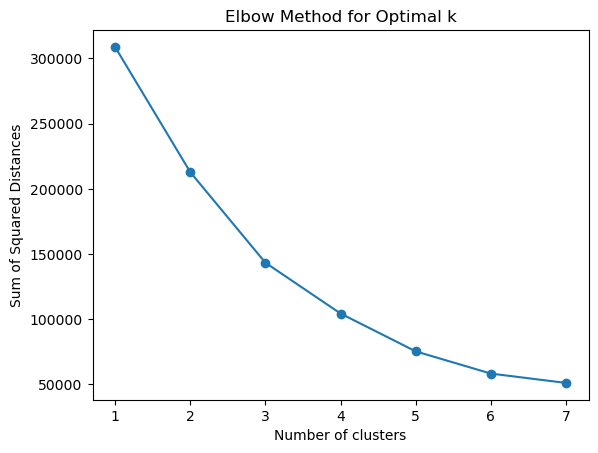

In [11]:
ssd = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(mallDataCleaned)
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 8), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [12]:
AggCluster = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')   
AggCluster.fit_predict(mallDataCleaned)
print(AggCluster.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
from sklearn.metrics import silhouette_score

linkage_methods = ['ward', 'complete', 'average', 'single']
for linkage in linkage_methods:
    clusters = AgglomerativeClustering(n_clusters = 2, linkage = linkage)
    cluster_labels = clusters.fit_predict(mallDataCleaned)
    print(cluster_labels)
    silhouette_avg = silhouette_score(mallDataCleaned, cluster_labels)
    print(f"Silhouette score for {linkage} linkage: {silhouette_avg}")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette score for ward linkage: 0.29916602844367
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette score for complete linkage: 0.29916602844367
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

We can calculate the silhouette score for different linkage methods ('ward', 'complete', 'average', 'single') and choose the one that gives the highest silhouette score, indicating better cluster quality. However, the choice of linkage method may also depend on the specific characteristics of your data and the clustering task at hand.